In [1]:
import tensorflow as tf
# import numpy as np
import matplotlib.pyplot as plt


In [2]:
from data_set import train_dataset, test_dataset, train_images

(60000, 28, 28)
(10000, 28, 28)


In [3]:
from CVAE import Conditional_VAE, Conditional_Encoder, Conditional_Decoder

In [4]:
latent_dim = 20

In [5]:
VAE = Conditional_VAE(latent_dim)
VAE.build()
VAE.summary()

Model: "conditional_vae"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conditional__encoder            │ ?                      │       111,416 │
│ (Conditional_Encoder)           │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conditional__decoder            │ ?                      │        85,857 │
│ (Conditional_Decoder)           │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 197,273 (770.60 KB)

 Trainable params: 197,273 (770.60 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
VAE.compile(optimizer=tf.keras.optimizers.Adam())

In [7]:
# get first item in data set as iterable then get first item of iterable
images, labels = list(train_dataset.take(1))[0]
image = images[0]
label = labels[0]

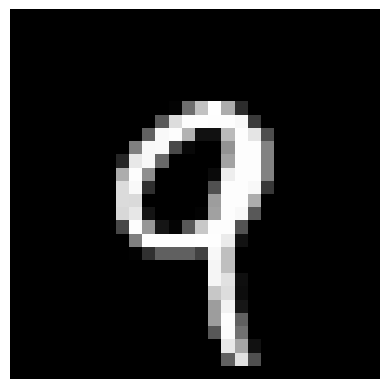

In [8]:
image = tf.squeeze(image)
# Display the digit using matplotlib
plt.imshow(image, cmap='gray')
plt.axis('off')  # Hide axis
plt.show()

In [9]:
image = tf.expand_dims(image, axis=0)
label = tf.expand_dims(label, axis=0)

image.shape, label.shape

(TensorShape([1, 28, 28]), TensorShape([1, 10]))

In [10]:
label

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)>

In [11]:
VAE.encoder.predict([image, label])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


(array([[-0.04091577,  0.02693543, -0.04023959,  0.04484856,  0.01248378,
         -0.06522059, -0.0028715 , -0.05219771,  0.00189286,  0.06894691,
         -0.02476017,  0.01343755, -0.05693175, -0.06599732, -0.01671534,
         -0.02175788, -0.0489441 , -0.06578574,  0.03419838, -0.01233859]],
       dtype=float32),
 array([[0.91176516, 1.0522295 , 0.9919002 , 1.0418562 , 1.0070367 ,
         0.9643269 , 0.9531493 , 0.8742768 , 0.9866512 , 1.0435174 ,
         1.1319432 , 1.0163053 , 0.9619692 , 0.99124885, 0.97222865,
         1.0716891 , 0.97981   , 0.9943261 , 0.9219444 , 1.0385404 ]],
       dtype=float32))

In [12]:
resulting_image = VAE.predict([image, label])

resulting_image = tf.squeeze(resulting_image)
resulting_image.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step


TensorShape([28, 28])

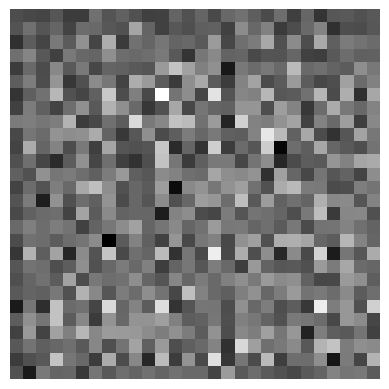

In [13]:
# Display the digit using matplotlib
plt.imshow(resulting_image, cmap='gray')
plt.axis('off')  # Hide axis
plt.show()

In [14]:
# now lets attempt inference for multiple images at once
images, labels = list(train_dataset.take(1))[0]

images = images[:2]
labels = labels[:2]

In [15]:
images.shape, labels.shape

(TensorShape([2, 28, 28]), TensorShape([2, 10]))

In [16]:
labels

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)>

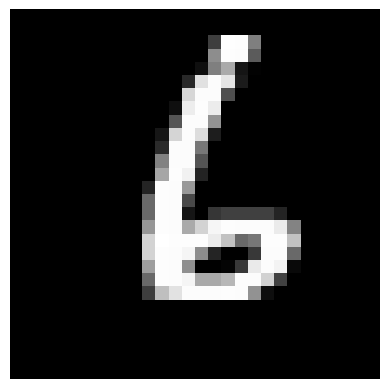

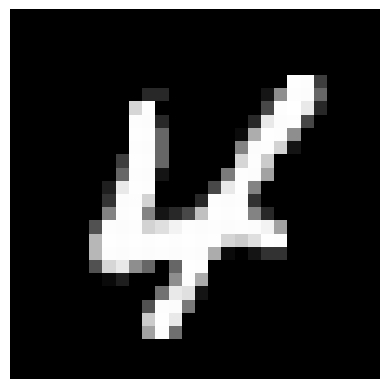

In [17]:
for image in images:
    image = tf.squeeze(image)
    # Display the digit using matplotlib
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Hide axis
    plt.show()

In [18]:
image_predictions = VAE.predict([images, labels])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


In [19]:
image_predictions[0].shape

(28, 28, 1)

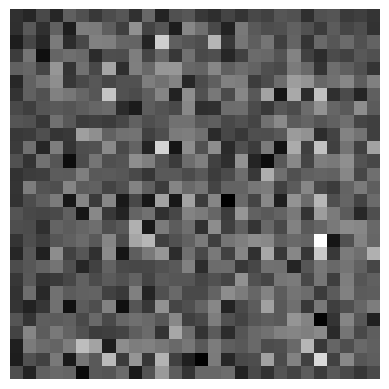

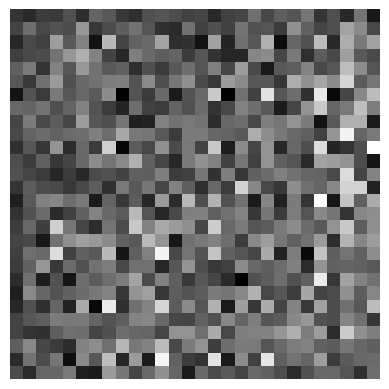

In [20]:
for image in image_predictions:
    image = tf.squeeze(image)
    # Display the digit using matplotlib
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Hide axis
    plt.show()

In [21]:
image_batch, labels_batch = list(train_dataset.take(1))[0]

image_batch.shape, labels_batch.shape

(TensorShape([32, 28, 28]), TensorShape([32, 10]))

In [25]:
train_dataset.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [27]:
VAE.fit(train_dataset.take(1), epochs=10)

Epoch 1/10
